# <font color = 'BlueViolet'>**IA e Segurança** 
## Análise de risco de fraudes transacionais </font>


### Sobre o dataset:
- O dataset contem dados de transações bancárias (cash-in e out, débito, pagamento e transferência)
- Totalizando **3713576 transações**. 
- Destas, **336788** são fraudes (9.07%).
### Importante:
- Vemos que o dataset é altamente desbalanceado, com uma baixíssima porporção de fraudes (classe positiva). Neste caso, não é recomendado usar uma matriz de confusão por não representar uma medida significativa de performance em modelos desbalanceados.
- Todos os valores são numéricos, sem dados de localidade ou data e hora da transação.


### Dados:
- **Amount**: Valor da transação.
- **isFraud**: Indica se a transação é **legítima (0)** ou  **fraude (1)**.


## 1. Análises iniciais


### Bibliotecas utilizadas:

In [6]:
#  Manipulação e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sidetable as stb

#  Machine Learning
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold


# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier


# from sklearn.model_selection import cross_val_score



### Carregar o dataset e visualizar os valores:

In [7]:
df = pd.read_csv('New_Dataset.csv')
df.head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,89.24,0,89.24,0.0,0,0.0,89.24,1,0,0,0,0,0,1
1,89.24,1,89.24,0.0,1,0.0,0.00,1,0,0,1,0,0,0
2,70.62,2,70.62,0.0,2,0.0,70.62,1,0,0,0,0,0,1
3,70.62,3,70.62,0.0,3,0.0,0.00,1,0,0,1,0,0,0
4,22695.14,4,22695.14,0.0,4,0.0,22695.14,1,0,0,0,0,0,1


In [9]:
df_test = pd.read_parquet('test-00000-of-00001.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [3]:
# Colunas do dataset
df.columns.tolist()

['amount',
 'nameOrig',
 'oldBalanceOrig',
 'newBalanceOrig',
 'nameDest',
 'oldBalanceDest',
 'newBalanceDest',
 'isFraud',
 'isUnauthorizedOverdraft',
 'action__CASH_IN',
 'action__CASH_OUT',
 'action__DEBIT',
 'action__PAYMENT',
 'action__TRANSFER']

## Valores possíveis para as colunas:

In [7]:
## Valores possíveis para as colunas:
df['nameOrig'].unique()

array([     0,      1,      2, ..., 188452, 188453, 188454],
      shape=(188455,))

In [ ]:
df['nameDest'].unique()

array([     0,      1,      2, ..., 219102, 219103, 219104],
      shape=(219105,))

### Tamanho da base de dados:

In [3]:
print("O dataset possui {} linhas e {} colunas.".format(df.shape[0], df.shape[1]))

O dataset possui 3713576 linhas e 14 colunas.


### <font color = 'BlueViolet'>Como visto, temos um registros de 3713576 transações, com 14 colunas.</font>

### Visão geral de organização dos dados:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713576 entries, 0 to 3713575
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amount                   float64
 1   nameOrig                 int64  
 2   oldBalanceOrig           float64
 3   newBalanceOrig           float64
 4   nameDest                 int64  
 5   oldBalanceDest           float64
 6   newBalanceDest           float64
 7   isFraud                  int64  
 8   isUnauthorizedOverdraft  int64  
 9   action__CASH_IN          int64  
 10  action__CASH_OUT         int64  
 11  action__DEBIT            int64  
 12  action__PAYMENT          int64  
 13  action__TRANSFER         int64  
dtypes: float64(5), int64(9)
memory usage: 396.7 MB


### <font color = 'BlueViolet'>Não temos valores nulos, então não será necessário se preocupar em substitui-los para não haver distorções.</font>

### Visão geral de estatísticas descritivas:

In [7]:
df.describe(include='float')

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
count,3.713576e+06,3.713576e+06,3.713576e+06,3.713576e+06,3.713576e+06
mean,2.544929e+05,2.238621e+06,2.156862e+06,6.405038e+04,1.499370e+05
std,5.702028e+05,1.470512e+06,1.522028e+06,2.071222e+05,4.868473e+05
min,0.000000e+00,-1.994681e+05,-1.994681e+05,-1.142105e+05,-2.316637e+04
25%,4.870973e+04,8.775562e+05,6.710188e+05,8.740160e+03,1.685267e+04
50%,1.231877e+05,2.380429e+06,2.316763e+06,3.931027e+04,4.867997e+04
75%,1.993595e+05,3.397556e+06,3.376386e+06,7.737530e+04,9.067437e+04
max,2.191388e+07,3.348603e+07,3.370815e+07,8.522232e+06,2.191388e+07


<font color = 'BlueViolet'> 
- O valor médio das transações é de 25.4492, com um desvio padrão maior que a média (57.0202). Isso indica a presença de outliers. 
</font>

In [ ]:
df[df['isFraud']==1].shape[0] 


336788

In [6]:
df[df['isFraud']==1].shape[0] / df.shape[0] * 100

9.06910212689871

In [22]:
df['amount'].sum()

np.float64(945078908204.52)

In [20]:
df.groupby(['isFraud']).agg({'amount': ['sum']}).stb.pretty()

,amount
,sum
isFraud,
0,473.06B
1,472.02B


In [12]:
df[df['action__CASH_IN'] == 1].groupby(['action__CASH_IN']).agg({'amount': ['sum']}).stb.pretty()


,amount
,sum
action__CASH_IN,
1,309.36B


In [13]:
df[df['action__CASH_OUT'] == 1].groupby(['action__CASH_OUT']).agg({'amount': ['sum']}).stb.pretty()


,amount
,sum
action__CASH_OUT,
1,295.81B


In [14]:
df[df['action__DEBIT'] == 1].groupby(['action__DEBIT']).agg({'amount': ['sum']}).stb.pretty()


,amount
,sum
action__DEBIT,
1,751.13M


In [15]:
df[df['action__PAYMENT'] == 1].groupby(['action__PAYMENT']).agg({'amount': ['sum']}).stb.pretty()


,amount
,sum
action__PAYMENT,
1,4.09B


In [16]:
df[df['action__TRANSFER'] == 1].groupby(['action__TRANSFER']).agg({'amount': ['sum']}).stb.pretty()

,amount
,sum
action__TRANSFER,
1,335.06B


## 2. Análise exploratória e análises gráficas

### Distribuição de fraudes vs. transações legítimas:

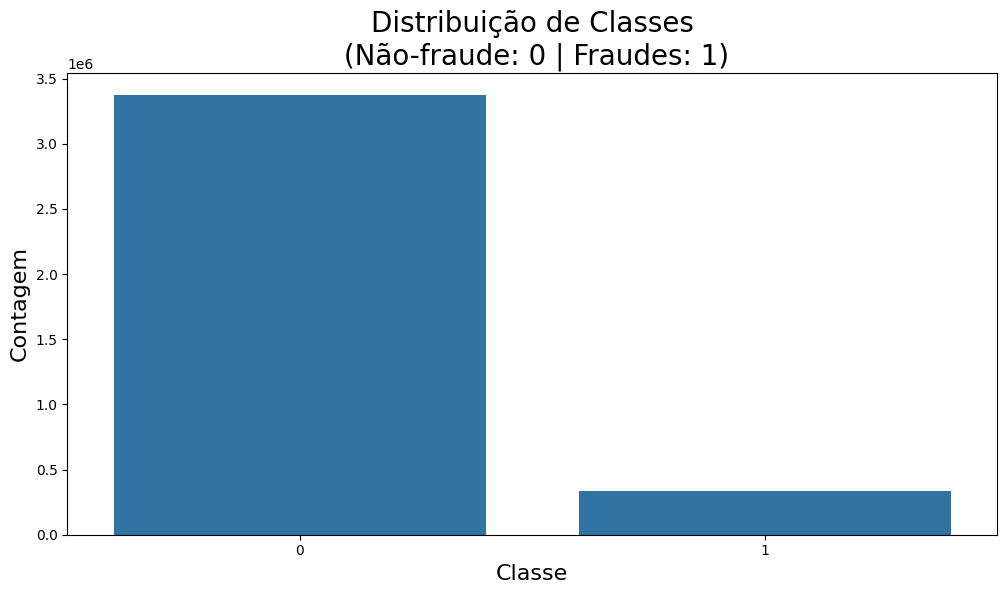

In [6]:
# Distribuição das classes
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='isFraud', data=df)
ax.set_title('Distribuição de Classes\n (Não-fraude: 0 | Fraudes: 1)', fontsize=20)
ax.set_xlabel('Classe', fontsize=16)
ax.set_ylabel('Contagem', fontsize=16)
plt.show()

In [2]:
import duckdb 

In [ ]:
duckdb.read_csv_auto('New_Dataset.csv')

In [13]:
# Criar feature com duckdb
# Média de valor por usuário (nameOrig se cash-out, nameDest se cash-in)
# Cash-out:
avg_amount_user = duckdb.sql("""
    SELECT 
        nameOrig,
        AVG(amount) AS avg_amount_per_user
    FROM df
    GROUP BY nameOrig""").df()
df = df.merge(avg_amount_user, on='nameOrig', how='left')
# Cash-in:
avg_amount_user = duckdb.sql("""
    SELECT 
        nameDest,
        AVG(amount) AS avg_amount_per_user
    FROM df
    GROUP BY nameDest""").df()
# Inserir nova coluna no dataframe original
df = df.merge(avg_amount_user, on='nameDest', how='left')

In [15]:
# Validar se a feature foi criada corretamente
duckdb.sql("""
    SELECT *
    FROM df
    WHERE nameOrig = '0'""").df().head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER,avg_amount_per_user_x,avg_amount_per_user_y
0,89.24,0,89.24,0.00,0,0.00,89.24,1,0,0,0,0,0,1,264607.017273,150733.576667
1,235964.87,0,0.00,235964.87,39983,3936.01,3936.01,0,0,1,0,0,0,0,264607.017273,137101.781800
2,222221.91,0,1127923.04,1350144.95,39617,7313.13,7313.13,0,0,1,0,0,0,0,264607.017273,202590.695870
3,157220.38,0,1350144.95,1507365.33,40730,11274.49,11274.49,0,0,1,0,0,0,0,264607.017273,173115.322500
4,17011.80,0,1507365.33,1490353.53,3442,0.00,0.00,0,0,0,0,1,0,0,264607.017273,8076.183151


,nameDest,avg_amount_per_user
0,4122,111566.976885
1,21475,129490.657600
2,35800,311407.888481
3,28733,261484.972371
4,28453,149513.273302
...,...,...
219100,213696,930972.440000
219101,213715,46134.300000
219102,213725,288035.190000
219103,213791,178101.420000


### <font color = 'BlueViolet'> Essa enorme predominância de transações que não são fraudes cria um modelo que "assume" que a maior parte das transações é legítima. Como isso não necessariamente é verdade, precisamos que o modelo detecte padrões que sinalizam atividade suspeita. </fonte>

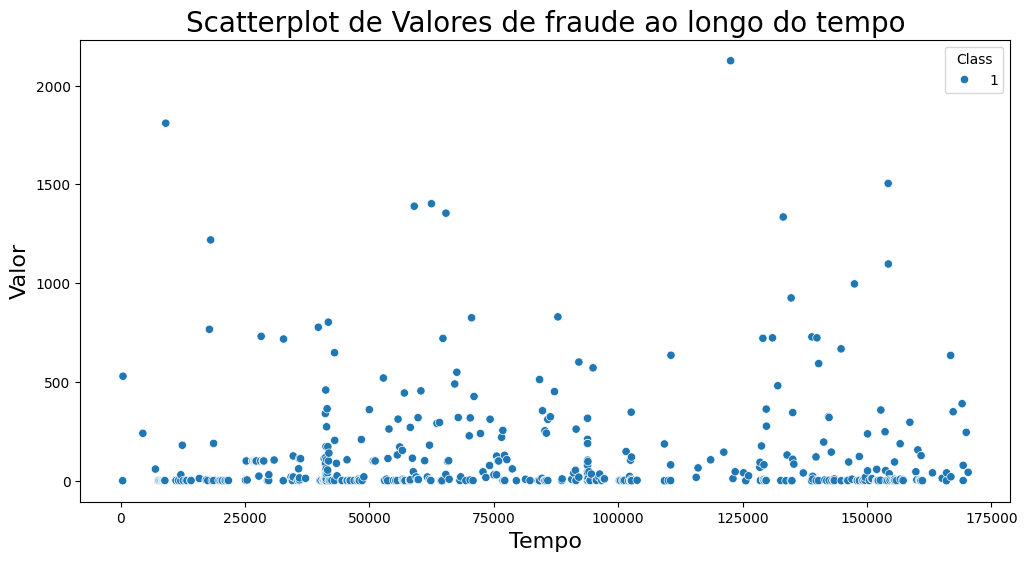

In [90]:
# Gráfico de valores ao longo do tempo
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Time', y='Amount', hue='Class', data=df[df['Class'] == 1])
ax.set_title('Scatterplot de Valores de fraude ao longo do tempo', fontsize=20)
ax.set_xlabel('Tempo', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)

plt.show()

### <font color = 'BlueViolet'>Aqui, observa-se que transações fraudulentas envolvem valores menores.
### Além disso, podemos observar que transações de valores maiores concentram-se no período de 25000 a 50000 segundos e 125000 a 150000 segundos após a primeira transação.</font>

## 3. Balanceando o Dataset
### <p style='font-size: 28px; margin: 10px 50px'>Como visto nas análises preliminares, a distribuição desigual de fraudes e transações legítimas pode criar previsões pouco acuradas.</p>
###  <p style='font-size: 28px; margin: 10px 50px'>Para contornar a situação, primeiro devemos transformar as colunas de tempo e valor para a mesma escala das demais colunas, a fim de o modelo tratar os mesmos tipos de dados.</p>
###  <p style='font-size: 28px; margin: 10px 50px'>Além disso, precisamos criar um **subset** com o mesmo número de fraudes e transações legítimas, evitando **overfitting** e obtendo correlações mais precisas das variáveis "V" com a variável target (Class).</p>

### Tranformando 'Amount' e 'Time' para colunas com valores em escala

In [91]:
# Vamos utilizar um scaler, classe que normaliza os dados, do tipo RobustScaler
# Essa classe é menos propensa a outliers.

rob_scaler = RobustScaler()

# Tranformando a coluna Amount com o método fit_transform
df['amount_scaled'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Tranformando a coluna Time com o método fit_transform
df['time_scaled'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Vamos remover as colunas originais, pois não as utilizaremos
df.drop(['Time', 'Amount'], axis=1, inplace=True)


In [92]:
# Visualizando os valores normalizados
df[['amount_scaled', 'time_scaled']].head()

,amount_scaled,time_scaled
0,1.783274,-0.994983
1,-0.269825,-0.994983
2,4.983721,-0.994972
3,1.418291,-0.994972
4,0.670579,-0.994960


### Dividindo o dataset em treino e teste
### <p style='font-size: 28px; margin: 10px 50px'> Apesar de a intenção ser treinar o modelo com um subset que tenha o mesmo número de fraudes e transações verdadeiras, devemos testá-lo no dataset original.</p>

In [93]:
# X = variáveis feature, Y = variável target
X = df.drop('Class', axis=1)
y = df['Class']

#  Classe para auxiliar na divisão entre treino/teste
s_split = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#  Dividindo os dados em treino e teste
for i_train, i_test in s_split.split(X, y):
    df_Xtrain, df_Xtest = X.iloc[i_train], X.iloc[i_test]
    df_ytrain, df_ytest = y.iloc[i_train], y.iloc[i_test]


### Criando **subset** com Random Under-Sampling (remover dados para o balanceamento)
### <p style='font-size: 28px; margin: 10px 50px'> Como temos 492 fraudes, vamos selecionar 492 transações legítimas aleatoriamente para termos uma base equilibrada.</p>

In [94]:
# Selecionar dados aleatoriamente toda vez que o código for executado

df = df.sample(frac=1)

fraudes = df[df['Class'] == 1]
nao_fraudes = df[df['Class'] == 0][:492]

df_balanceado = pd.concat([fraudes, nao_fraudes])

# Ordenar linhas de forma aleatória
df_treino = df_balanceado.sample(frac=1, random_state=42)

df_treino.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
97494,-1.476227,-0.952857,1.964646,-0.317292,-1.850240,0.938911,-0.277517,0.397781,-0.713834,0.181522,...,1.293491,-0.340686,0.125732,0.463415,0.222789,-0.224747,-0.276574,0,3.116048,-0.216755
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1,-0.293440,-0.789154
202348,2.196894,-1.524308,-1.064457,-1.638443,-1.175909,-0.384950,-1.143242,-0.041345,-1.401979,1.748992,...,0.029551,0.235537,0.727658,-0.221997,-0.217968,-0.011264,-0.049583,0,0.391253,0.582655
189878,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,-2.297734,...,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,1,-0.293440,0.515784
154684,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-43.557242,-41.044261,-13.320155,-24.588262,...,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,1,-0.307273,0.210059


### Avaliando a distribuição de classes novamente.

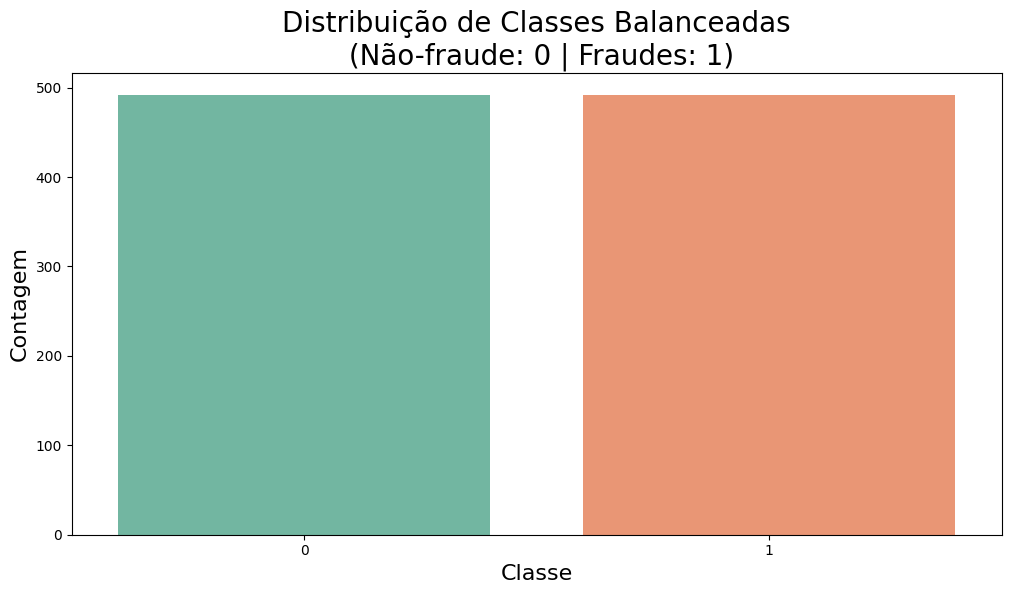

In [95]:
# Distribuição das classes
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Class', data=df_treino, 
                   hue='Class', legend=False, palette='Set2')
ax.set_title('Distribuição de Classes Balanceadas\n (Não-fraude: 0 | Fraudes: 1)', fontsize=20)
ax.set_xlabel('Classe', fontsize=16)
ax.set_ylabel('Contagem', fontsize=16)
plt.show()

## 4. Correlação de variáveis

### Analisando correlação de variáveis feature com a variável target no dataset original

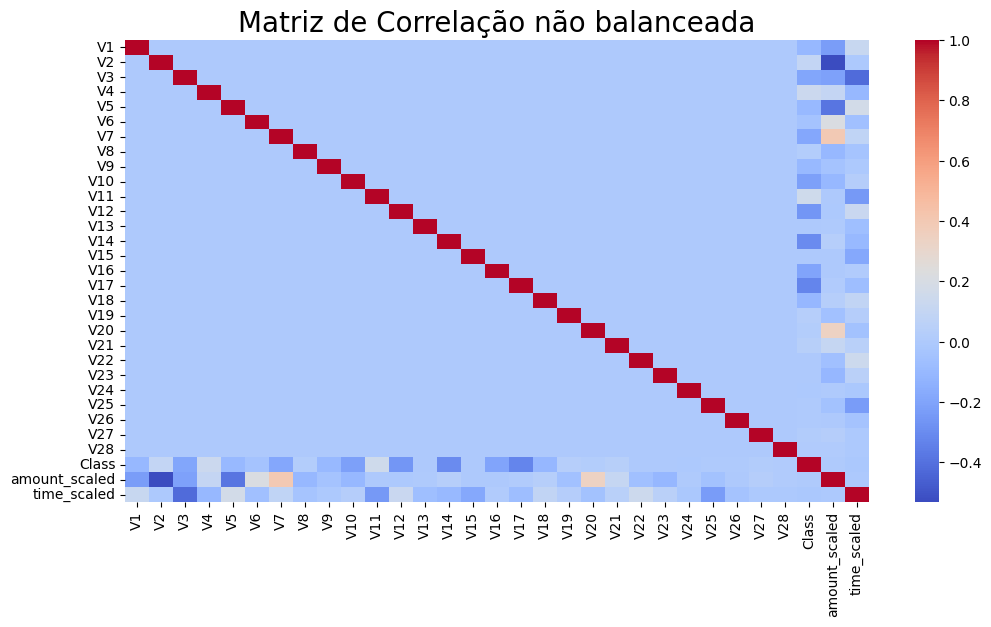

In [96]:
plt.figure(figsize=(12, 6))

corr = df.corr()
ax = sns.heatmap(corr, cmap='coolwarm', annot_kws={'size': 20})
ax.set_title('Matriz de Correlação não balanceada', fontsize=20)
plt.show()

### Analisando correlação de variáveis feature com a variável target no dataset balanceado

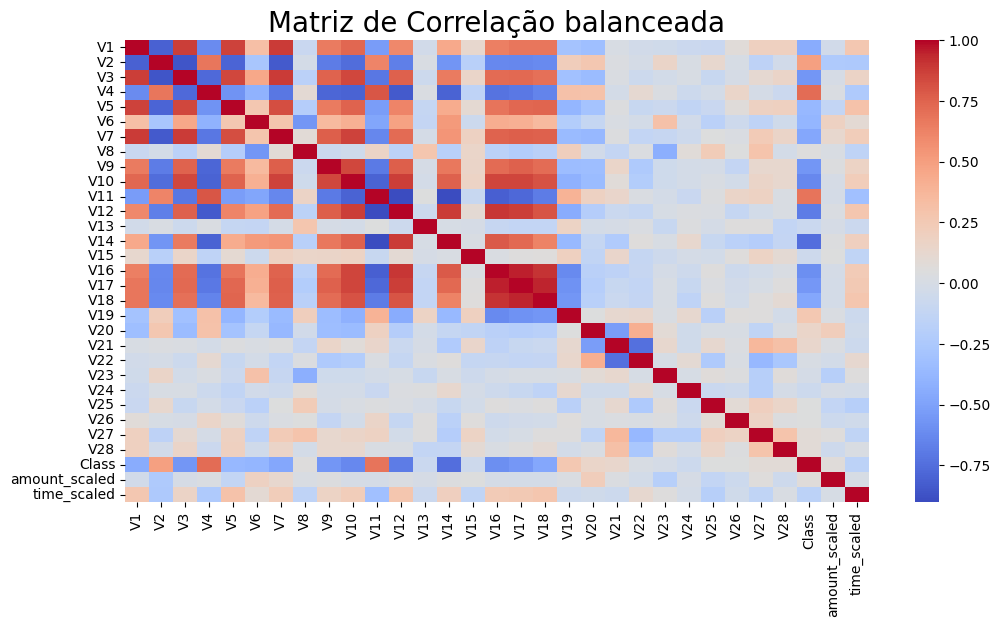

In [97]:
plt.figure(figsize=(12, 6))

corr = df_treino.corr()
ax = sns.heatmap(corr, cmap='coolwarm', annot_kws={'size': 20})
ax.set_title('Matriz de Correlação balanceada', fontsize=20)
plt.show()

### <font color = 'BlueViolet'>Após pré-processamento dos dados, apesar de não sabermos o que significam, observamos que V1, V14, V12 e V10 possuem forte correlação **negativa** com o resultado (fraude). 
### Da mesma forma, V2, V4, V11 e V19 possuem correlação **positiva** com o tipo de transação. </font>

### Relação V14 vs. Probabilidade de Fraude

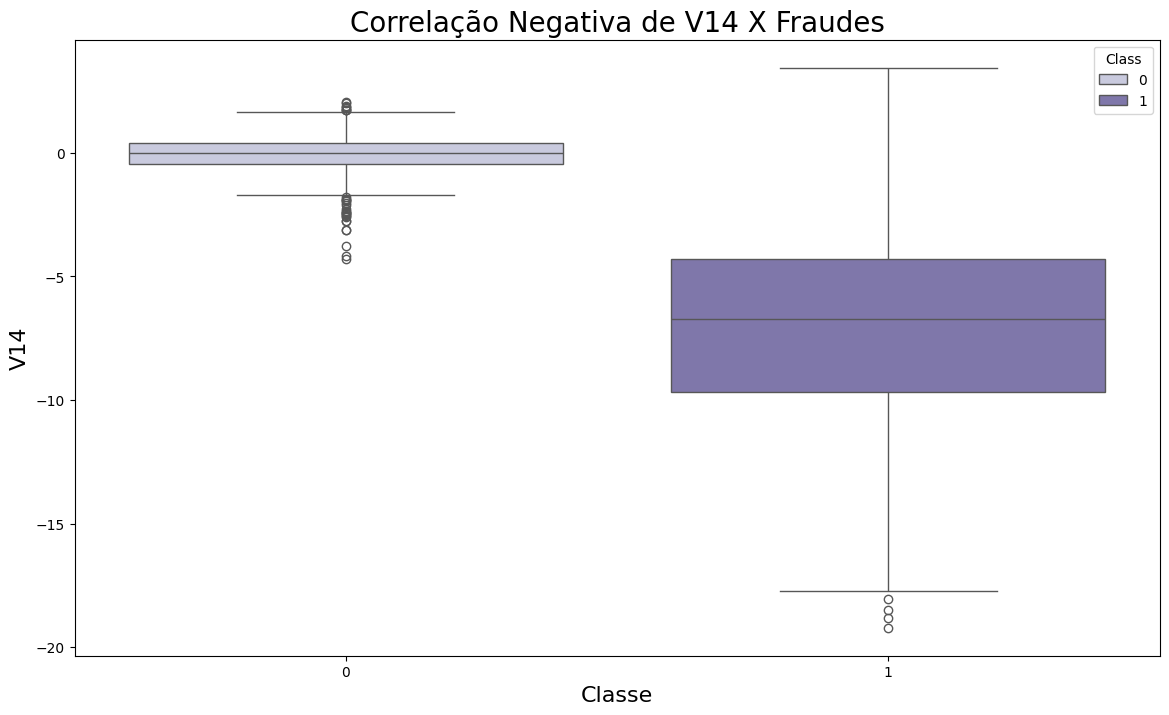

In [98]:
plt.figure(figsize=(14, 8))

ax = sns.boxplot(x='Class', y='V14', data=df_treino, hue='Class', palette='BlueViolets')

ax.set_title('Correlação Negativa de V14 X Fraudes', fontsize=20)
ax.set_xlabel('Classe', fontsize=16)
ax.set_ylabel('V14', fontsize=16)
plt.show()

### <font color = 'BlueViolet'>Logo, quanto **menor** o valor de V14, maior a probabilidade de a transação ser uma fraude. </font>

### Relação de V4 vs. Probabilidade de Fraude

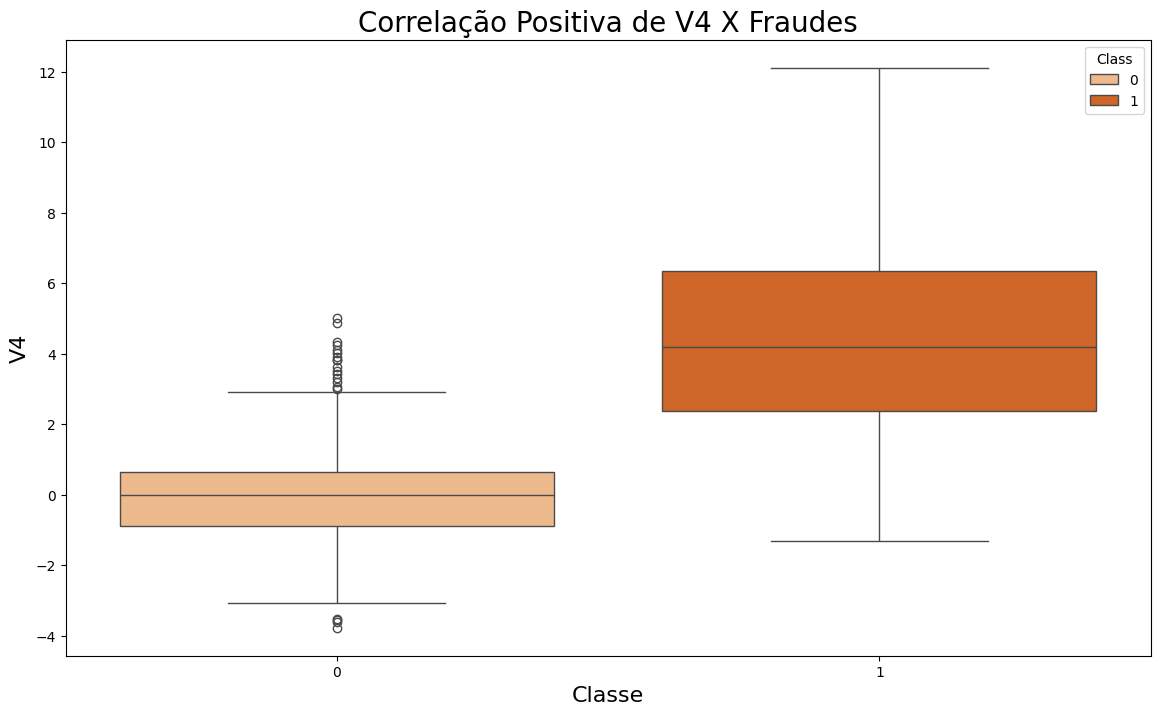

In [99]:
plt.figure(figsize=(14, 8))

ax = sns.boxplot(x='Class', y='V4', data=df_treino, hue='Class', palette='Oranges')

ax.set_title('Correlação Positiva de V4 X Fraudes', fontsize=20)
ax.set_xlabel('Classe', fontsize=16)
ax.set_ylabel('V4', fontsize=16)
plt.show()

### <font color = 'BlueViolet'> Nesse caso, quanto **maior** o valor de V4, maior a probabilidade de a transação ser uma fraude. </font>

## 4. Prevendo fraudes com Machine Learning
### <p style='font-size: 28px; margin: 10px 50px'>Finalmente, vamos testar diferentes modelos para identificar fraudes e avaliar sua eficiência. </p>
### <p style='font-size: 28px; margin: 10px 50px'>Os modelos testados serão: ``LogisticRegression`` e ``RandomForest``</p>

In [100]:
modelo_lr = LogisticRegression()
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

### Remover outliers **extremos**

In [101]:
fraudes_v14 = df_treino['V14'].loc[df_treino['Class'] == 1].values

# IQR = Interquartile Range, diferença entre o terceiro e o primeiro quartil
quartil_1, quartil_3 = np.percentile(fraudes_v14, [25, 75])
print("1º Quartil: {}\n3º Quartil: {}".format(quartil_1, quartil_3))

iqr = quartil_3 - quartil_1
print("IQR: {}".format(iqr))

# Consideramos outliers extremos aqueles cujo valor é maior que 1.5 vezes o IQR
# Valores que atingirem esse limiar serão removidos

limiar_v14 = iqr * 1.5
lim_inferior, lim_superior = quartil_1 - limiar_v14, quartil_3 + limiar_v14
print("Critério de eliminação: {}".format(limiar_v14))
print("Serão removidos valores de V14 abaixo de {}\ne acima de {}".format(lim_inferior, lim_superior))

# Valores que atingem o criterio
ext_outliers = [x for x in fraudes_v14 if x < lim_inferior or x > lim_superior]
print("Quantidade de outliers em V14: {}".format(len(ext_outliers)))

df_treino = df_treino.drop(df_treino[(df_treino['V14'] > lim_superior) | (df_treino['V14'] < lim_inferior)].index)

df_treino.shape

1º Quartil: -9.692722964972386
3º Quartil: -4.282820849486865
IQR: 5.409902115485521
Critério de eliminação: 8.114853173228282
Serão removidos valores de V14 abaixo de -17.807576138200666
e acima de 3.8320323237414167
Quantidade de outliers em V14: 4


(980, 31)

In [102]:
fraudes_v12 = df_treino['V12'].loc[df_treino['Class'] == 1].values

# IQR = Interquartile Range, diferença entre o terceiro e o primeiro quartil
quartil_1, quartil_3 = np.percentile(fraudes_v12, [25, 75])
print("1º Quartil: {}\n3º Quartil: {}".format(quartil_1, quartil_3))

iqr_v12 = quartil_3 - quartil_1
print("IQR: {}".format(iqr_v12))

# Consideramos outliers extremos aqueles cujo valor é maior que 1.5 vezes o IQR
# Valores que atingirem esse limiar serão removidos

limiar_v12 = iqr_v12 * 1.5
lim_inferior_v12, lim_superior_v12 = quartil_1 - limiar_v12, quartil_3 + limiar_v12
print("Critério de eliminação: {}".format(limiar_v12))
print("Serão removidos valores de V12 abaixo de {}\ne acima de {}".format(lim_inferior_v12, lim_superior_v12))

# Valores que atingem o criterio
ext_outliers = [x for x in fraudes_v12 if x < lim_inferior_v12 or x > lim_superior_v12]
print("Quantidade de outliers em V12: {}".format(len(ext_outliers)))

df_treino = df_treino.drop(df_treino[(df_treino['V12'] > lim_superior_v12) | (df_treino['V12'] < lim_inferior_v12)].index)

df_treino.shape


1º Quartil: -8.67303320439115
3º Quartil: -2.893030568676315
IQR: 5.780002635714835
Critério de eliminação: 8.670003953572252
Serão removidos valores de V12 abaixo de -17.3430371579634
e acima de 5.776973384895937
Quantidade de outliers em V12: 4


(976, 31)

In [103]:
fraudes_v10 = df_treino['V10'].loc[df_treino['Class'] == 1].values

# IQR = Interquartile Range, diferença entre o terceiro e o primeiro quartil
quartil_1, quartil_3 = np.percentile(fraudes_v10, [25, 75])
print("1º Quartil: {}\n3º Quartil: {}".format(quartil_1, quartil_3))

iqr_v10 = quartil_3 - quartil_1
print("IQR: {}".format(iqr_v10))

# Consideramos outliers extremos aqueles cujo valor é maior que 1.5 vezes o IQR
# Valores que atingirem esse limiar serão removidos

limiar_v10 = iqr_v10 * 1.5
lim_inferior_v10, lim_superior_v10 = quartil_1 - limiar_v10, quartil_3 + limiar_v10
print("Critério de eliminação: {}".format(limiar_v10))
print("Serão removidos valores de V10 abaixo de {}\ne acima de {}".format(lim_inferior_v10, lim_superior_v10))

# Valores que atingem o criterio
ext_outliers = [x for x in fraudes_v10 if x < lim_inferior_v10 or x > lim_superior_v10]
print("Quantidade de outliers em V10: {}".format(len(ext_outliers)))

df_treino = df_treino.drop(df_treino[(df_treino['V10'] > lim_superior_v10) | (df_treino['V10'] < lim_inferior_v10)].index)

df_treino.shape


1º Quartil: -7.466658535821847
3º Quartil: -2.5118611381562523
IQR: 4.954797397665595
Critério de eliminação: 7.432196096498393
Serão removidos valores de V10 abaixo de -14.89885463232024
e acima de 4.92033495834214
Quantidade de outliers em V10: 27


(945, 31)

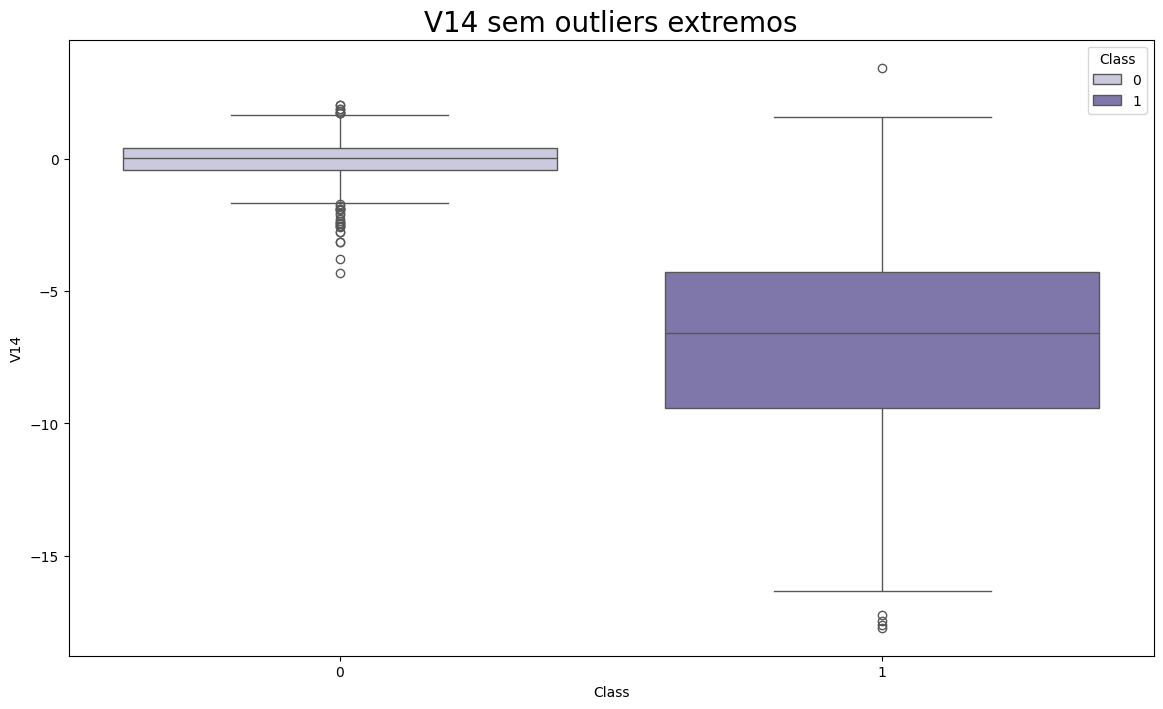

In [104]:
plt.figure(figsize=(14, 8))

# Visualizar comportamento após a remoção dos outliers
ax = sns.boxplot(x='Class', y='V14', data=df_treino, hue='Class', palette='BlueViolets')
ax.set_title('V14 sem outliers extremos', fontsize=20)

plt.show()


### Prevendo fraudes com `LogisticRegression`

In [105]:
# undersampling
X = df_treino.drop('Class', axis=1)
y = df_treino['Class']

# Dividindo em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(df_treino.drop('Class', axis=1), df_treino['Class'], test_size=0.2, random_state=42)
# Converter para array
X_train, X_test = X_train.values, X_test.values
y_train, y_test = y_train.values, y_test.values

# Treinando o modelo de Regressão Logística
modelo_lr.fit(X_train, y_train)

# Usamos cross-validation para avaliar o modelo
score_lr = cross_val_score(modelo_lr, X_train, y_train, cv=5)
print("Score de Treino Regressão Logística: {}%".format(round(score_lr.mean(), 4)* 100))

Score de Treino Regressão Logística: 93.92%


### Prevendo fraudes com `RandomForest`

In [106]:
# Treinando o modelo Random Forest
modelo_rf.fit(X_train, y_train)

# Avaliando o modelo
score_rf = cross_val_score(modelo_rf, X_train, y_train, cv=5)
print("Score de Treino Random Forest: {}%".format(round(score_rf.mean(), 4)* 100))

Score de Treino Random Forest: 93.39%


## <font color = 'BlueViolet'>**Conclusão:**
## Após identificarmos potenciais problemas na análise preliminar, foi possível obter modelos com resultados satisfatórios após tratá-los com diversas técnicas de pré-processamento.
## Os modelos tiveram desempenho similar, com o modelo de Regressão Logística performando ligeiramente melhor, </font>

## <font color = 'BlueViolet'> **Passos futuros:**
## - Aplicar mais técnicas para otimização dos modelos, como GridSearchCV (seleção de hiperparâmetros)
## - Análises de outras técnicas de balanceamento, como SMOTE (Synthetic Minority Over-sampling Technique)
## - Avaliar falsos positivos e falsos negativos dos modelos